In [27]:
print("krishna")

krishna


In [1]:
import pandas as pd
import numpy as np


In [2]:
df = pd.read_csv(r"C:\\Users\\ritik\\Downloads\\archive (9)\\spam.csv", encoding="latin1")
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Data cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns=['Unnamed: 2' , 'Unnamed: 3' , 'Unnamed: 4'] , inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns = {'v1':'target' , 'v2' : 'text'} , inplace=True)
df.sample(5)

,target,text
3475,ham,"I can probably come by, everybody's done aroun..."
5167,ham,Oh did you charge camera
985,ham,Carlos says he'll be at mu in &lt;#&gt; minutes
3922,ham,Okay lor... Will they still let us go a not ah...
1524,ham,Hi:)cts employee how are you?


In [9]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['target'] = lb.fit_transform(df['target'])

In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## missing value
df.isnull().sum().sum()

np.int64(0)

In [12]:
## duplicate rows
df.duplicated().sum()

np.int64(403)

In [13]:
df = df.drop_duplicates(keep = 'first')
df.duplicated().sum()

np.int64(0)

## EDA

In [14]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

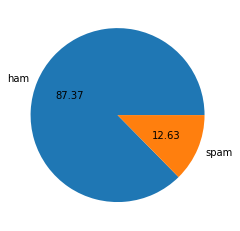

In [17]:
plt.pie(df['target'].value_counts(), labels =['ham' , 'spam'],autopct="%0.2f")
plt.show()

In [18]:
## Data is imbalanced

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ritik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [23]:
## nums of words
df['num_words'] = df['text'].apply(lambda x :len(nltk.word_tokenize(x)))

In [24]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [26]:
## counting the number of sentences
df['num_sent'] = df['text'].apply(lambda x :len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [28]:
## we have created new features like num_characters,num_words and num_sent that actually find outthe nummber of characters ,words and sentences in the text

In [29]:
df[['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [30]:
df[df['target'] == 1][['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [31]:
df[df['target'] == 0][['num_characters' , 'num_words' , 'num_sent']].describe()

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

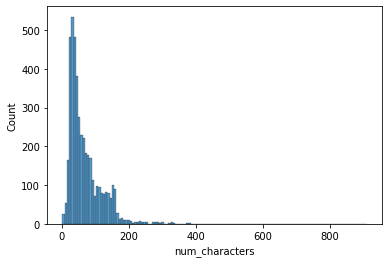

In [32]:
sns.histplot(df[df['target'] == 0]['num_characters'])

<Axes: xlabel='num_characters', ylabel='Count'>

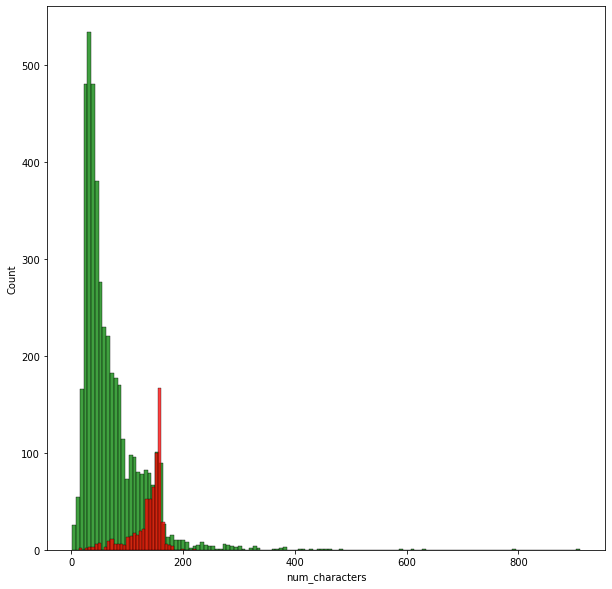

In [33]:
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_characters'] , color='green')
sns.histplot(df[df['target'] == 1]['num_characters'] , color = 'red')

# Observation :
### The spam messages are made up of more number of characters 
### The ham messages are made up of comparitevely less num of characters

<Axes: xlabel='num_words', ylabel='Count'>

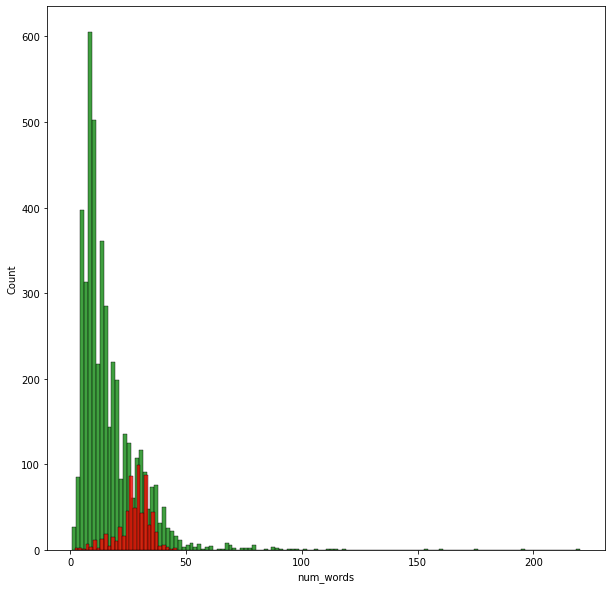

In [34]:
## numbber of words
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_words'] , color='green')
sns.histplot(df[df['target'] == 1]['num_words'] , color = 'red')

In [35]:
df.head()

,target,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<Axes: xlabel='num_sent', ylabel='Count'>

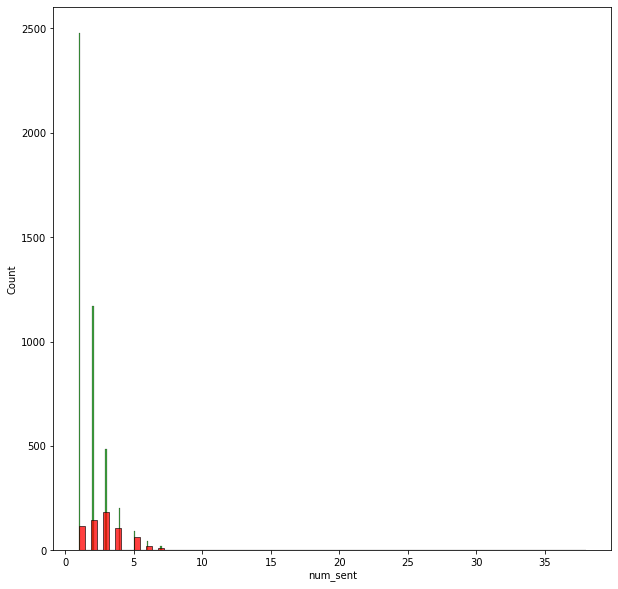

In [36]:
## number of sentences
plt.figure(figsize=(10,10))
sns.histplot(df[df['target'] == 0]['num_sent'] , color='green')
sns.histplot(df[df['target'] == 1]['num_sent'] , color = 'red')

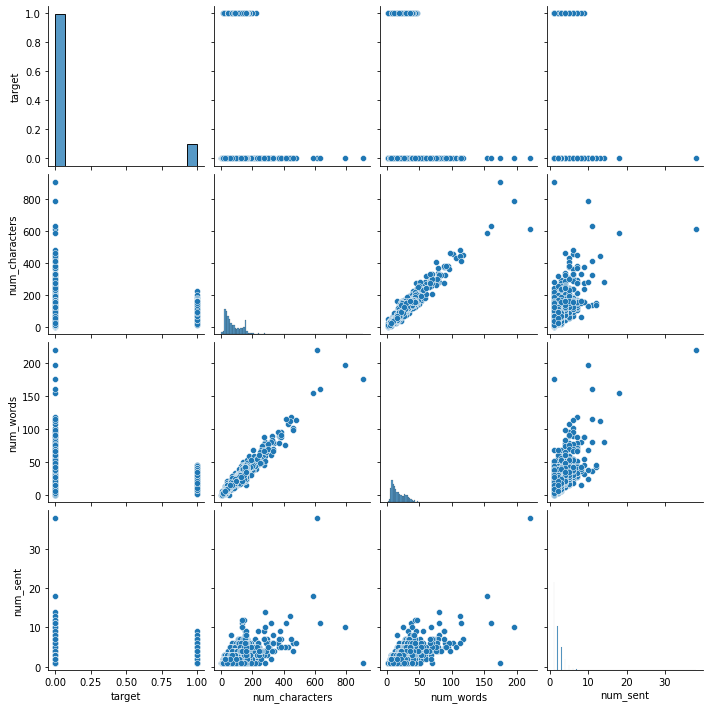

In [37]:
sns.pairplot(df)

In [38]:
## finding the correlation
df[['num_characters', 'num_words', 'num_sent','target']].corr()

,num_characters,num_words,num_sent,target
num_characters,1.000000,0.965760,0.624139,0.384717
num_words,0.965760,1.000000,0.679971,0.262912
num_sent,0.624139,0.679971,1.000000,0.263939
target,0.384717,0.262912,0.263939,1.000000


<Axes: >

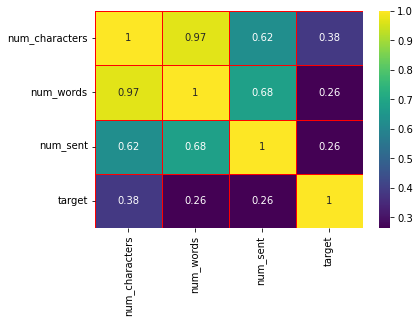

In [39]:
sns.heatmap(
    df[['num_characters', 'num_words', 'num_sent','target']].corr(),
    annot=True,
    cmap='viridis',
    linewidths=0.5,          # thickness of the lines
    linecolor='red'        # color of the lines
)

# Data Preprocessing
- lower case
- tokenization
- removing special characters
- removing stop words and punctuation
- stemming


In [40]:
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
def transform_text(text):

    ## lowercase
    text = text.lower()

    ## tokenisation
    text = nltk.word_tokenize(text)

    ## removing the special characters
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    ## removing stopwords and punctuations
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    ## stemming
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
        
    


    return " ".join(y)

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.sample(3)

,target,text,num_characters,num_words,num_sent,transformed_text
5441,0,"By the way, make sure u get train to worc fore...",90,21,2,way make sure u get train worc foreg street sh...
3868,0,No let me do the math. Your not good at it.,43,13,2,let math good
1062,0,Ok. Not sure what time tho as not sure if can ...,122,30,4,sure time tho sure get librari class tri see p...


## word cloud in spam and ham

In [43]:
from wordcloud import WordCloud
wc = WordCloud(width=500 , height = 500 , min_font_size=10 , background_color = 'white')

In [44]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

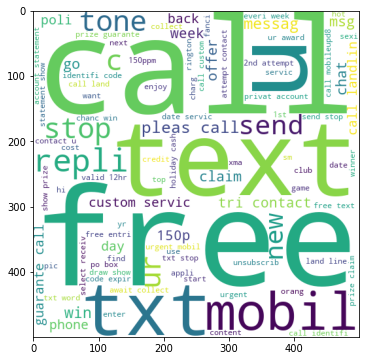

In [45]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)


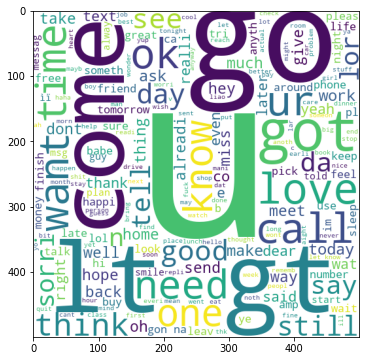

In [46]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

## finding the most frequent words

## Spam

In [47]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split( ):
        spam_corpus.append(word)


In [48]:
len(spam_corpus)

9939

<ipython-input-49-517b291b4b35>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)


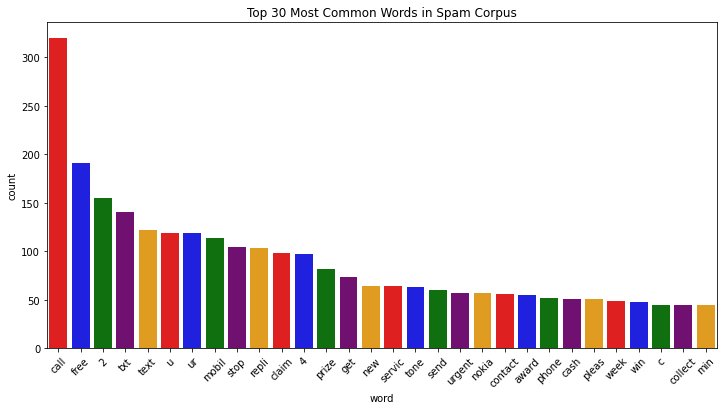

In [49]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 most common words and their counts
top_words = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
custom_colors = ['red', 'blue', 'green', 'purple', 'orange'] * 6  
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in Spam Corpus")
plt.show()


## ham

In [50]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split( ):
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

35404

<ipython-input-52-86b8e2ee2c76>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)


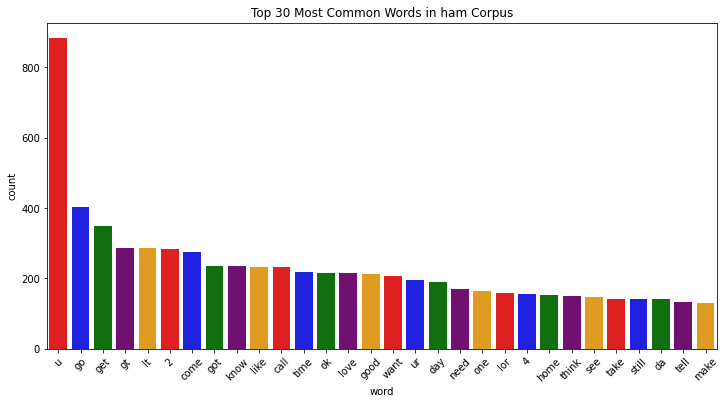

In [52]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 30 most common words and their counts
top_words = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
custom_colors = ['red', 'blue', 'green', 'purple', 'orange'] * 6  
# Plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=top_words, palette=custom_colors)
plt.xticks(rotation=45)
plt.title("Top 30 Most Common Words in ham Corpus")
plt.show()

## Text Representation

In [107]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [108]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [109]:
X.shape

(5169, 3000)

In [110]:
y = df['target'].values

## Splitting

In [111]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2,random_state=42)

## NAIVE BAYES

In [112]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB , BernoulliNB
from sklearn.metrics import accuracy_score , confusion_matrix,precision_score
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [97]:
gnb.fit(X_train , y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test , y_pred1))
print(confusion_matrix(y_test , y_pred1))
print(precision_score(y_test , y_pred1))

0.8636363636363636
[[771 118]
 [ 23 122]]
0.5083333333333333


In [113]:
mnb.fit(X_train , y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test , y_pred2))
print(confusion_matrix(y_test , y_pred2))
print(precision_score(y_test , y_pred2))

0.971953578336557
[[888   1]
 [ 28 117]]
0.9915254237288136


In [99]:
bnb.fit(X_train , y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test , y_pred3))
print(confusion_matrix(y_test , y_pred3))
print(precision_score(y_test , y_pred3))

0.9729206963249516
[[884   5]
 [ 23 122]]
0.9606299212598425


In [100]:
## -- tfidf --> mnb

In [101]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [102]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [103]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc
}

In [104]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [105]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9548872180451128
For  KN
Accuracy -  0.913926499032882
Precision -  1.0
For  NB
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
For  DT
Accuracy -  0.9352030947775629
Precision -  0.819672131147541
For  LR
Accuracy -  0.9497098646034816
Precision -  0.872
For  RF
Accuracy -  0.9700193423597679
Precision -  0.9913793103448276
For  AdaBoost
Accuracy -  0.9148936170212766
Precision -  0.7938144329896907


In [106]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.913926,1.000000
2,NB,0.971954,0.991525
5,RF,0.970019,0.991379
0,SVC,0.976789,0.954887
4,LR,0.949710,0.872000
3,DT,0.935203,0.819672
6,AdaBoost,0.914894,0.793814


## Pickling

In [114]:
import pickle
pickle.dump(tfidf , open('vectorizer.pkl' , 'wb'))
pickle.dump(mnb , open('model.pkl' , 'wb'))